In [1]:
import os
#os.environ['SPS_HOME'] = '/Users/annalena/Documents/GitHub/fsps'
os.environ['SPS_HOME'] = '/export/home/aschaibl/fsps'

# Bruzual&Charlot

In [2]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import HDF5SSPGrid
from rubix.utils import get_config

config = get_config("../rubix/config/rubix_config.yml")

ssp_bc = HDF5SSPGrid.from_file(config["ssp"]["templates"]["BruzualCharlot2003"], file_location="../rubix/spectra/ssp/templates")

2025-02-12 16:16:55,664 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-02-12 16:16:55,666 - rubix - INFO - Rubix version: 0.0.post373+g23db802
2025-02-12 16:17:00.302153: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


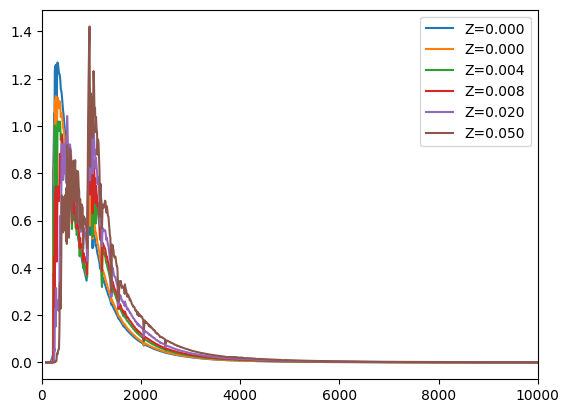

In [3]:
import matplotlib.pyplot as plt

# NBVAL_SKIP
for i in range(len(ssp_bc.metallicity)):
    plt.plot(ssp_bc.wavelength,ssp_bc.flux[i][0], label=r'Z=%0.3f'%ssp_bc.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,10000)
plt.legend()

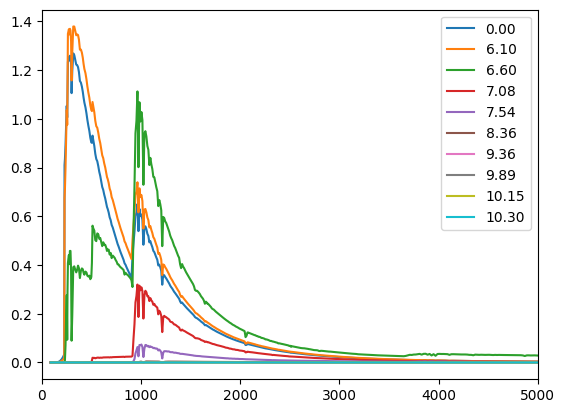

In [4]:
import numpy as np
ages = np.linspace(0,len(ssp_bc.age),10)
for age in ages:
    plt.plot(ssp_bc.wavelength,ssp_bc.flux[0][int(age)], label='%.2f'%ssp_bc.age[int(age)])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(0,5000)
plt.legend()

# MaStar

In [5]:
# NBVAL_SKIP
from rubix.spectra.ssp.grid import pyPipe3DSSPGrid
ssp_mastar = pyPipe3DSSPGrid.from_file(config["ssp"]["templates"]["Mastar_CB19_SLOG_1_5"], file_location="../rubix/spectra/ssp/templates")

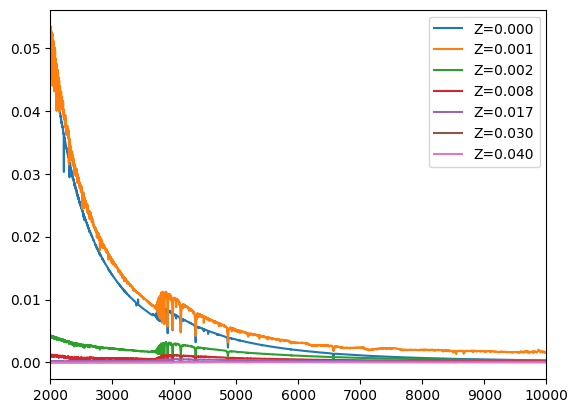

In [6]:
# NBVAL_SKIP
for i in range(len(ssp_mastar.metallicity)):
    plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[i][0], label=r'Z=%0.3f'%ssp_mastar.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

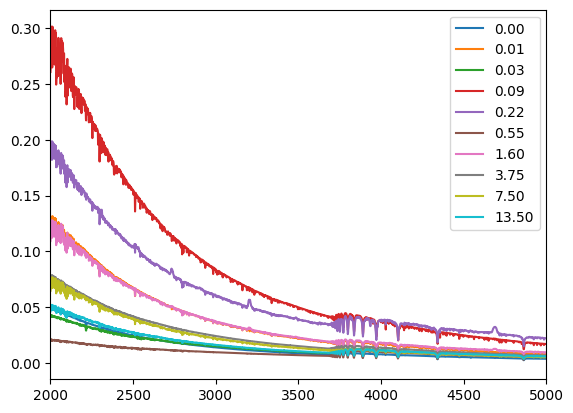

In [7]:
ages = np.linspace(0,len(ssp_mastar.age),10)
for age in ages:
    plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[0][int(age)], label='%.2f'%(ssp_mastar.age[int(age)]))
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()

# FSPS

In [8]:
from rubix.spectra.ssp.factory import get_ssp_template
ssp_fsps = get_ssp_template("FSPS")

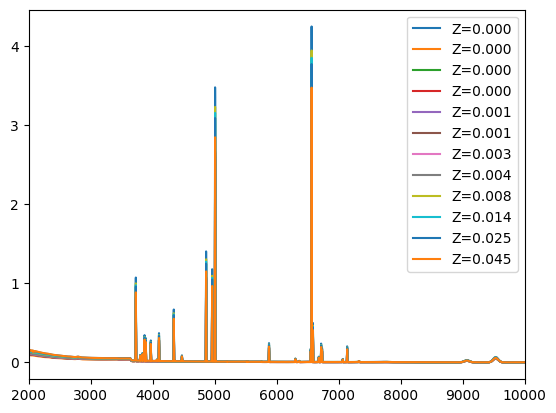

In [9]:
# NBVAL_SKIP
for i in range(len(ssp_fsps.metallicity)):
    plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[i][0], label=r'Z=%0.3f'%ssp_fsps.metallicity[i])
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,10000)
plt.legend()

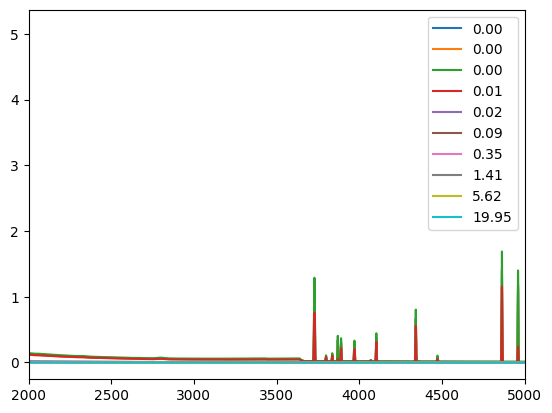

In [10]:
ages = np.linspace(0,len(ssp_fsps.age),10)
for age in ages:
    plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[0][int(age)], label='%.2f'%(ssp_fsps.age[int(age)]))
#plt.xlabel(r'$\lambda$ [%s]'%config["fields"]["wavelength"]["units"])
#plt.ylabel(r'Flux [%s]'%config["fields"]["flux"]["units"])
#plt.yscale("log")
plt.xlim(2000,5000)
plt.legend()

# Comparison of the SSP templates

In [11]:
print(ssp_bc.age[180])
print(ssp_mastar.age[36])
print(ssp_fsps.age[100])

10.0
10.25
10.0


In [12]:
print(ssp_bc.metallicity[3])
print(ssp_mastar.metallicity[3])
print(ssp_fsps.metallicity[8])

0.008
0.008
0.007985248


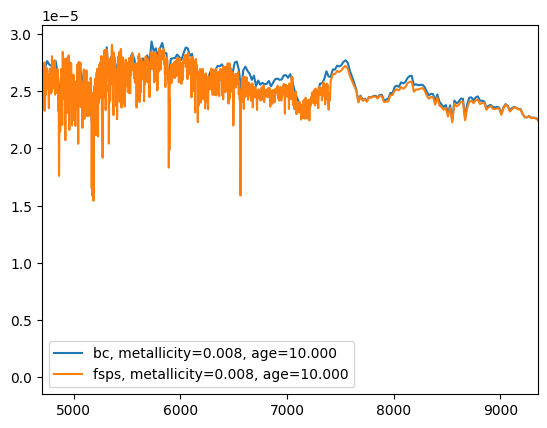

In [13]:
plt.plot(ssp_bc.wavelength,ssp_bc.flux[3][180], label=f'bc, metallicity={ssp_bc.metallicity[3]:.3f}, age={ssp_bc.age[180]:.3f}')
#plt.plot(ssp_mastar.wavelength,ssp_mastar.flux[3][36]/(ssp_mastar.wavelength**2)*299792458, label='mastar')
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[8][100], label=f'fsps, metallicity={ssp_fsps.metallicity[8]:.3f}, age={ssp_fsps.age[100]:.3f}')

#plt.plot(ssp_bc.wavelength,ssp_bc.flux[3][0], label='bc 0')
#plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[8][0], label='fsps 0')

#plt.xlim(1000, 20000)
plt.xlim(4700.15, 9351.4)
#plt.ylim(0, 0.01)
plt.legend()
plt.savefig("./output/ssp_comparison_bc_fsps_10_008_large.png")

In [14]:
import numpy as np

def find_closest_index(array, value):
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return index

In [15]:
ssp_bc.metallicity

Array([1.e-04, 4.e-04, 4.e-03, 8.e-03, 2.e-02, 5.e-02], dtype=float32)

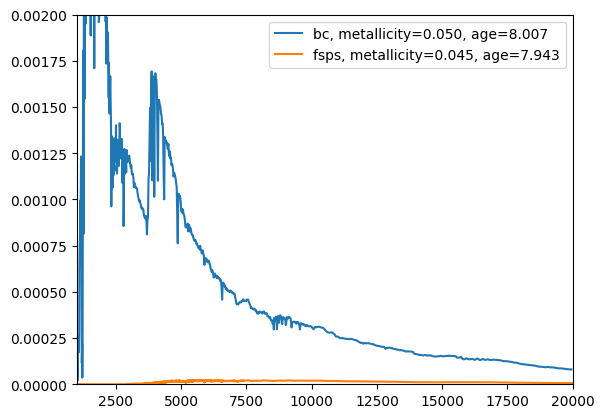

In [16]:
metallicity = 0.05
age = 8.0

index_metallicity_bc = find_closest_index(ssp_bc.metallicity, metallicity)
index_age_bc = find_closest_index(ssp_bc.age, age)
index_metallicity_fsps = find_closest_index(ssp_fsps.metallicity, metallicity)
index_age_fsps = find_closest_index(ssp_fsps.age, age)

plt.plot(ssp_bc.wavelength,ssp_bc.flux[index_metallicity_bc][index_age_bc], label=f'bc, metallicity={ssp_bc.metallicity[index_metallicity_bc]:.3f}, age={ssp_bc.age[index_age_bc]:.3f}')    
plt.plot(ssp_fsps.wavelength,ssp_fsps.flux[index_metallicity_fsps][index_age_fsps], label=f'fsps, metallicity={ssp_fsps.metallicity[index_metallicity_fsps]:.3f}, age={ssp_fsps.age[index_age_fsps]:.3f}')

#plt.xlim(4700.15, 9351.4)
plt.xlim(1000, 20000)
plt.ylim(0, 0.002)
plt.legend()
plt.savefig("./output/ssp_comparison_bc_fsps_8_05.png")

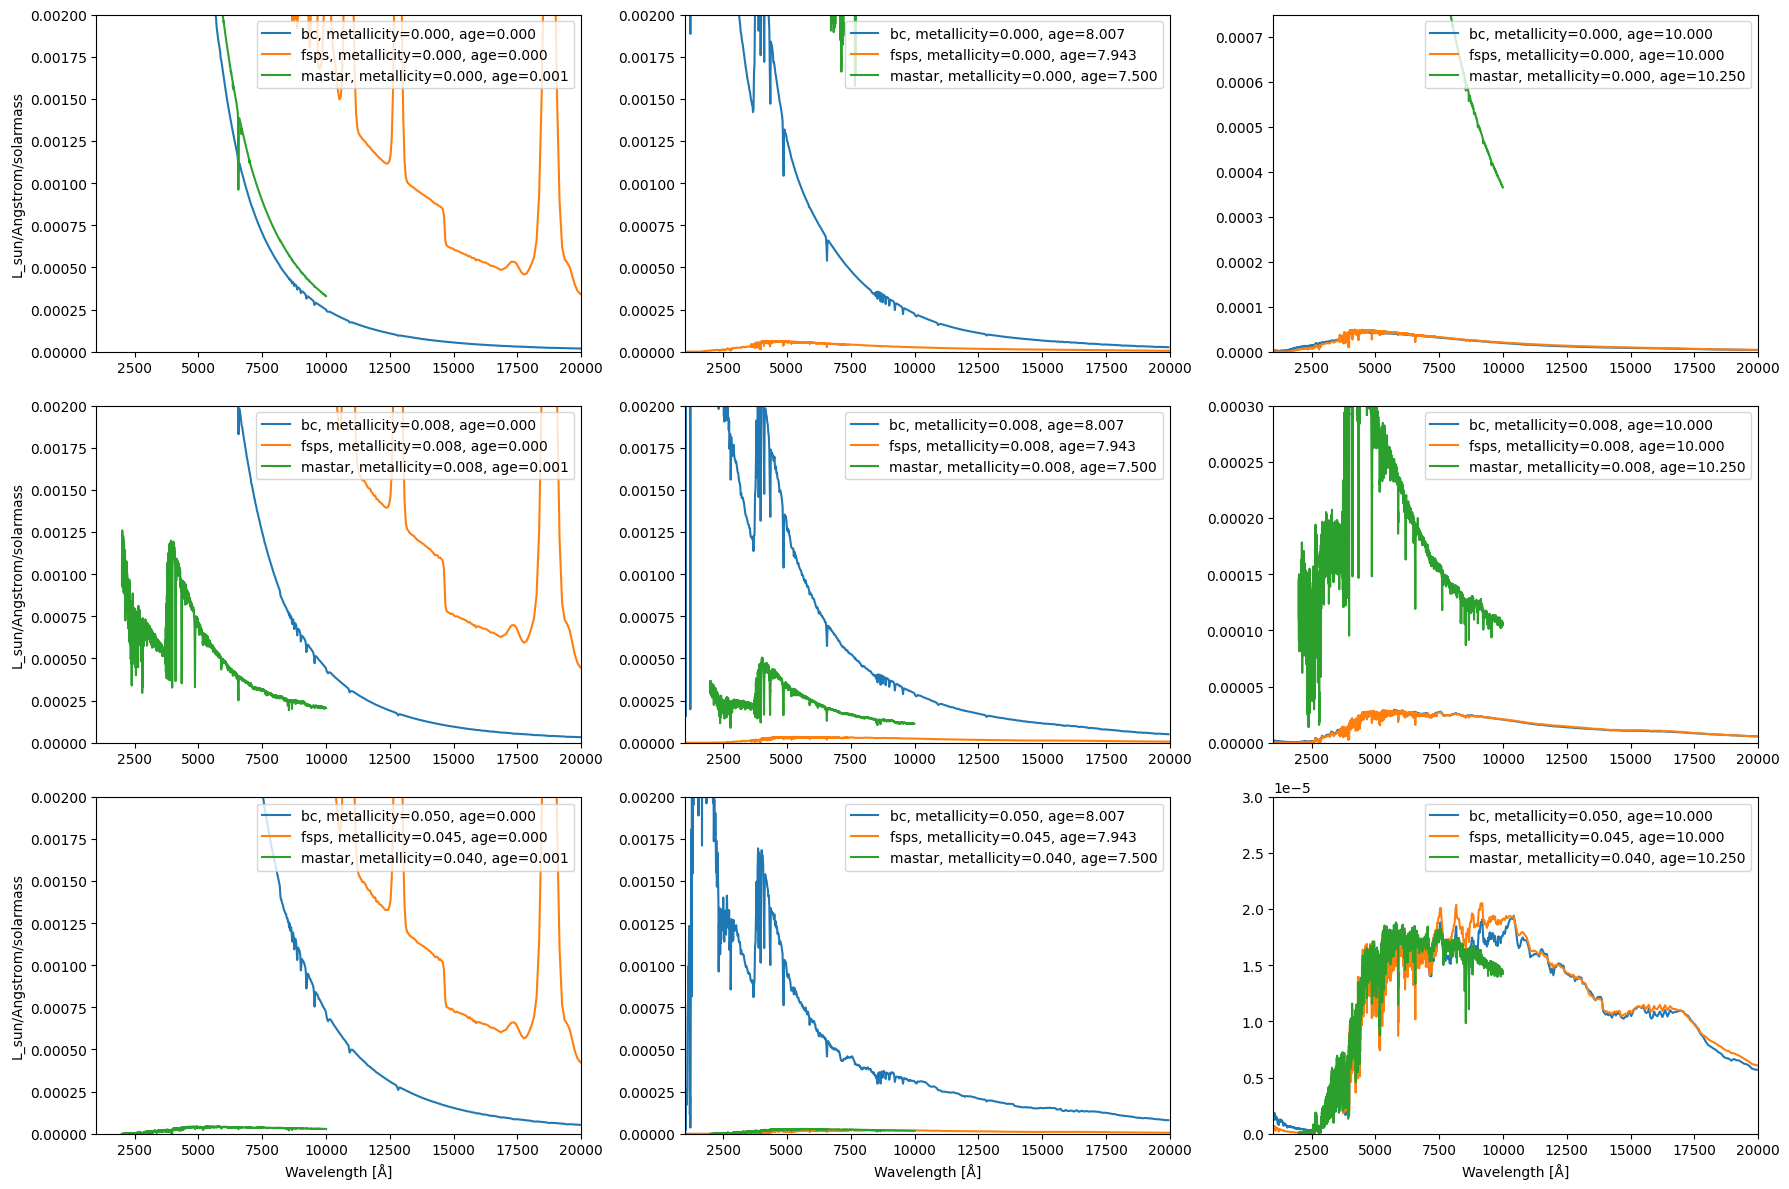

In [19]:
import matplotlib.pyplot as plt

# Define the metallicity and age values for the grid
metallicities = [1e-4, 8e-3, 5e-2]
ages = [0, 8, 10]

# Create a figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Loop over the grid and plot the data
for i, metallicity in enumerate(metallicities):
    for j, age in enumerate(ages):
        ax = axes[i, j]
        
        # Find the closest indices for the current metallicity and age
        index_metallicity_bc = find_closest_index(ssp_bc.metallicity, metallicity)
        index_age_bc = find_closest_index(ssp_bc.age, age)
        index_metallicity_fsps = find_closest_index(ssp_fsps.metallicity, metallicity)
        index_age_fsps = find_closest_index(ssp_fsps.age, age)
        index_metallicity_mastar = find_closest_index(ssp_mastar.metallicity, metallicity)
        index_age_mastar = find_closest_index(ssp_mastar.age, age)
        
        # Plot the data for the current metallicity and age
        ax.plot(ssp_bc.wavelength, ssp_bc.flux[index_metallicity_bc][index_age_bc], label=f'bc, metallicity={ssp_bc.metallicity[index_metallicity_bc]:.3f}, age={ssp_bc.age[index_age_bc]:.3f}')    
        ax.plot(ssp_fsps.wavelength, ssp_fsps.flux[index_metallicity_fsps][index_age_fsps], label=f'fsps, metallicity={ssp_fsps.metallicity[index_metallicity_fsps]:.3f}, age={ssp_fsps.age[index_age_fsps]:.3f}')
        ax.plot(ssp_mastar.wavelength, ssp_mastar.flux[index_metallicity_mastar][index_age_mastar], label=f'mastar, metallicity={ssp_mastar.metallicity[index_metallicity_mastar]:.3f}, age={ssp_mastar.age[index_age_mastar]:.3f}')
        
        # Set plot limits and labels
        ax.set_xlim(1000, 20000)
        if j == 2 and i == 2:
            ax.set_ylim(0, 0.00003)
        elif j == 2 and i == 1:
            ax.set_ylim(0, 0.0003)
        elif j == 2:
            ax.set_ylim(0, 0.00075)
        else:
            ax.set_ylim(0, 0.002)
        if i == 2:
            ax.set_xlabel('Wavelength [Å]')
        if j == 0:
            ax.set_ylabel('L_sun/Angstrom/solarmass')
        ax.legend(loc='upper right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("./output/ssp_comparison_grid.png")
plt.show()